### Teamwork-Supervised Learing
#### Team members: Meiran, Lishengxi, Zhang Jingyuan.
#### 中文名：梅然，李晟熙，张敬源
This is a dataset about human activity classification, consisting of 4 labels and 272 features.
 

#### 1. Data Pre-processing

In [61]:
# import sth
import sklearn
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [62]:
# read data
df = pd.read_csv('dataset.csv')
features = df.iloc[:, :-1]  # read feature
labels = df.iloc[:, -1]  # read label

#show data
df

,Mean_L_hallux,Range_L_hallux,St_Dev_L_hallux,Skewness_L_hallux,Kurtosis_L_hallux,DFR_L_hallux,Entropy_L_hallux,Energy_L_hallux,Mean_L_toes,Range_L_toes,...,Energy_R_mag_y,Mean_R_mag_z,Range_R_mag_z,St_Dev_R_mag_z,Skewness_R_mag_z,Kurtosis_R_mag_z,DFR_R_mag_z,Entropy_R_mag_z,Energy_R_mag_z,Label
0,117.5125,558.0,192.587460,1.271066,-0.034507,0.1783,-6713.7825,5.169266e+09,277.9850,1182.0,...,7.496750e+11,-742.663500,2841.75,598.380021,-0.946787,0.388256,0.2209,-46145.2712,1.168251e+11,downstairs
1,285.1325,1971.0,401.841201,2.244358,6.043515,0.1975,-19239.4775,2.589390e+10,420.2875,1761.0,...,9.030018e+11,-1038.084000,9676.80,1541.107858,1.504357,3.399815,0.0923,-169453.8976,3.620066e+11,downstairs
2,313.2925,1971.0,381.109542,2.439065,7.363269,0.2213,-19343.9062,2.729488e+10,566.8250,1761.0,...,1.339132e+12,-73.130250,9676.80,1926.697832,0.107699,-0.447804,0.0746,-163430.8428,2.971493e+11,downstairs
3,434.2375,1827.0,469.269182,1.121957,0.400659,0.2205,-26250.3631,4.774304e+10,729.2575,1849.0,...,7.376860e+11,338.552625,9254.40,1866.520614,-0.332954,0.596910,0.0591,-161704.5013,2.963615e+11,downstairs
4,544.0150,1827.0,509.326510,0.511355,-0.782151,0.2836,-28204.0649,6.805367e+10,870.6200,1948.0,...,8.535439e+11,-340.024500,9638.40,2836.116267,0.133436,-1.230015,0.0484,-271355.1914,6.604581e+11,downstairs
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,16.7275,132.0,41.550504,2.160707,2.705326,0.0846,-954.9611,1.825534e+08,19.8350,138.0,...,3.290809e+11,317.647875,4377.75,1163.692101,0.634335,-0.464264,0.1492,-58224.3614,1.242148e+11,spinning_bike
1196,11.9650,131.0,35.589751,2.741499,5.563885,0.0666,-751.4789,1.239845e+08,22.5400,138.0,...,3.434682e+11,272.236500,4300.95,1123.310678,0.609906,-0.415838,0.1752,-49310.4697,1.125520e+11,spinning_bike
1197,9.6675,128.0,31.223215,3.083986,7.631802,0.0601,-613.5523,9.275006e+07,23.3450,131.0,...,3.763346e+11,293.253750,4262.55,1180.292592,0.534295,-0.736452,0.1817,-52894.6522,1.249284e+11,spinning_bike
1198,11.6675,128.0,34.012705,2.707855,5.437852,0.0736,-698.6110,1.140998e+08,28.0450,134.0,...,3.678775e+11,378.217875,4492.95,1229.547258,0.393128,-0.998344,0.2093,-51164.6533,1.435290e+11,spinning_bike


In [63]:
# replace NaN
features.fillna(features.mean(), inplace=True)
df = pd.concat([features, labels], axis=1)

# Check if there are any missing values in the DataFrame
if df.isna().any().any():
    print("There are missing values in the DataFrame.")
else:
    print("There are no missing values in the DataFrame.")

There are no missing values in the DataFrame.


In [64]:
# features noemalized
features_normalized = features.apply(lambda x: (x - np.mean(x)) / (np.std(x)))

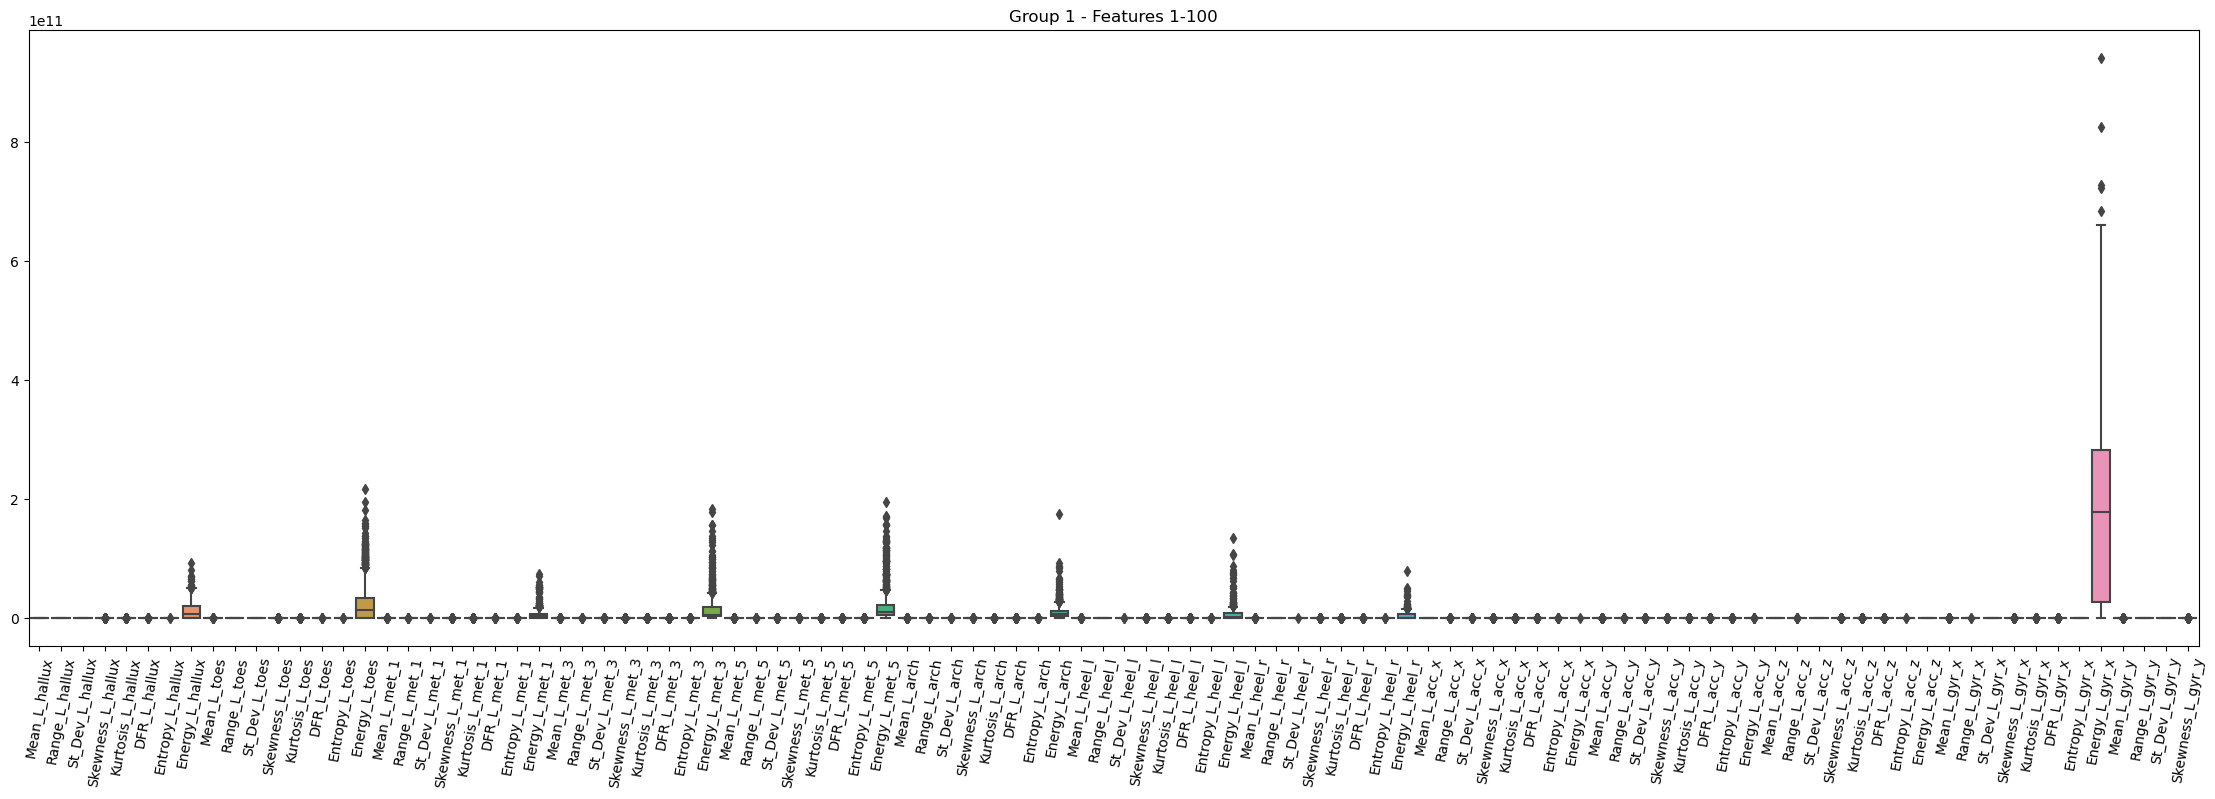

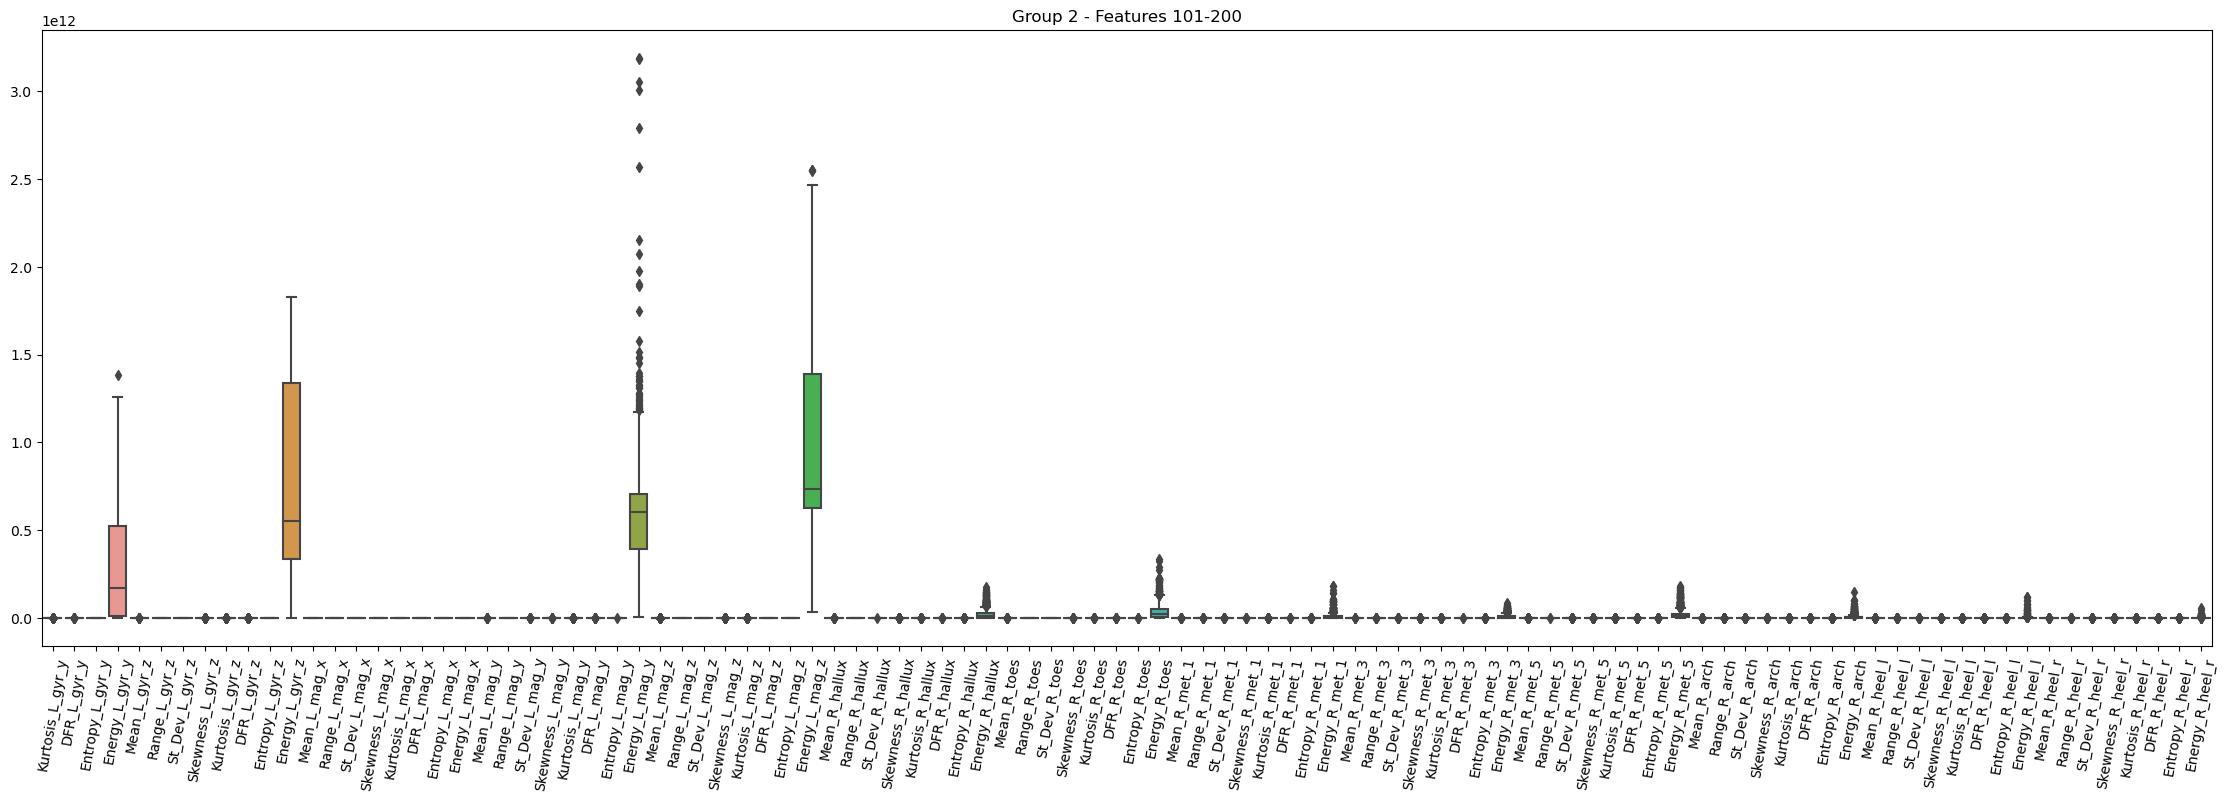

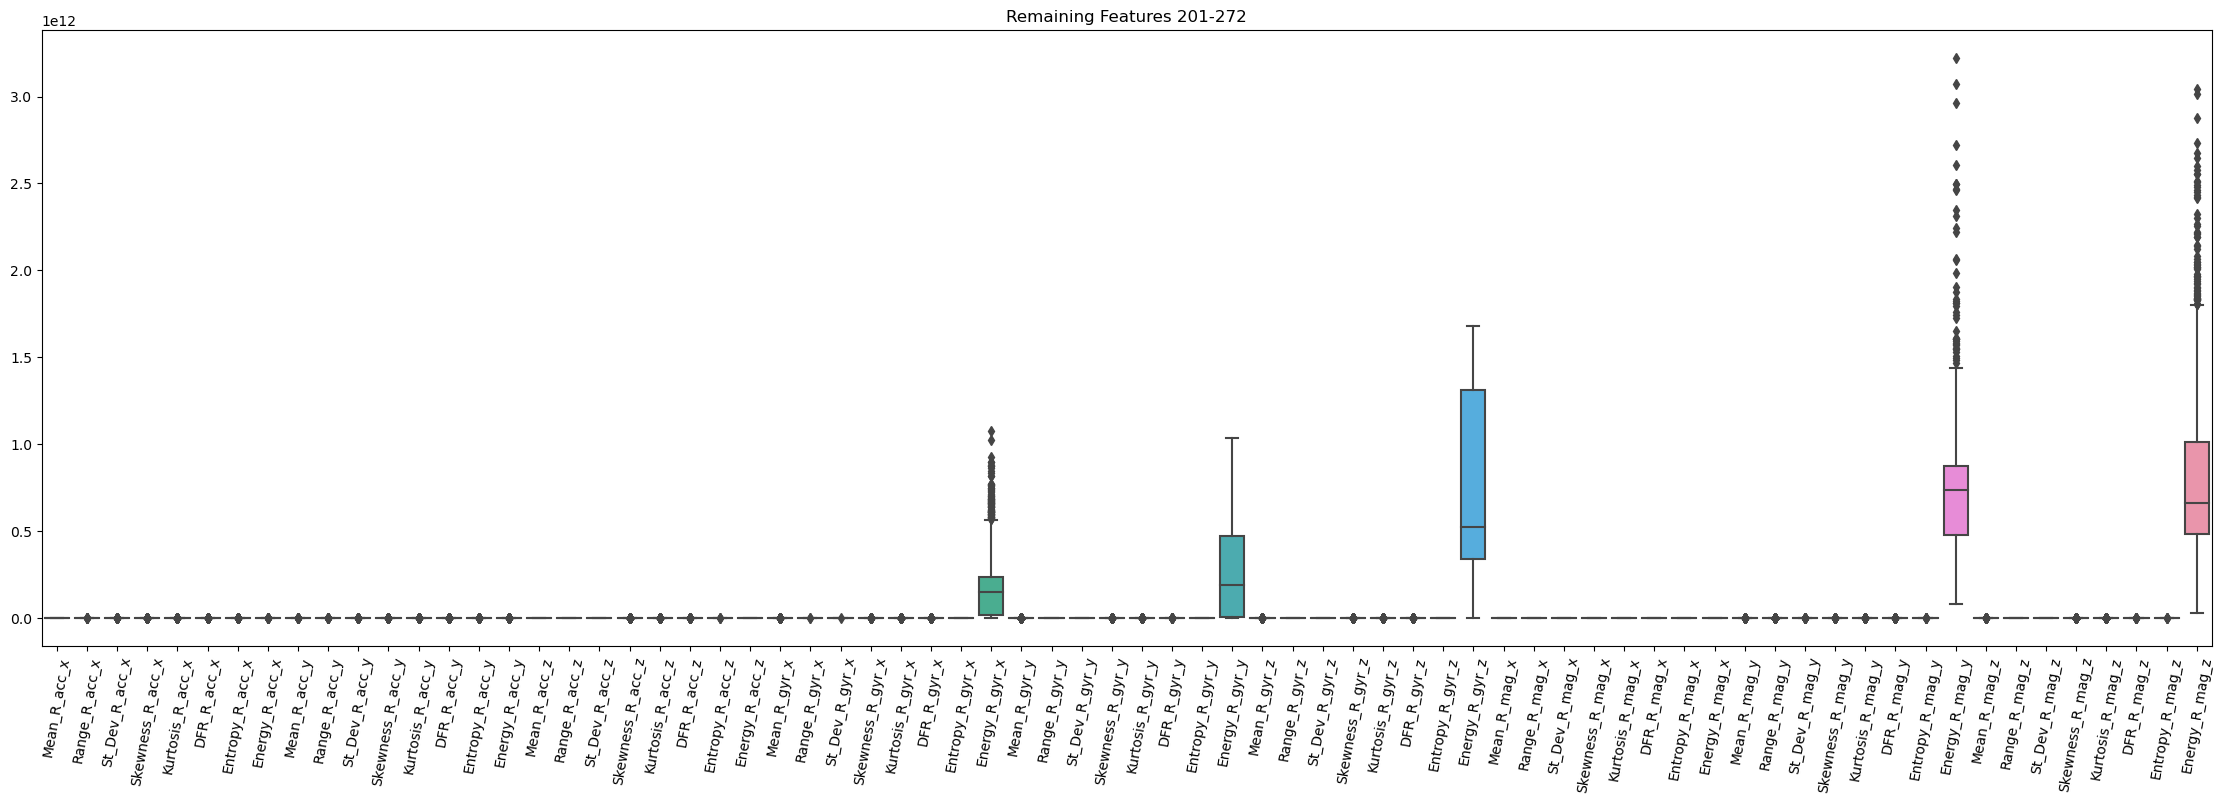

In [65]:
# draw boxplot
num_features = features.shape[1] # feature_size
group_size = 100 
num_groups = num_features // group_size 

# set figure size
fig_length = 28
fig_height = 8
sns.set_context({'figure.figsize':[28, 8]})

# draw by groups
for i in range(num_groups):
    start_index = i * group_size
    end_index = start_index + group_size

    group_features = features.iloc[:, start_index:end_index]  # read current group
    ax = sns.boxplot(data=group_features)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=80)
    plt.title(f"Group {i+1} - Features {start_index+1}-{end_index}")
    plt.show()

#draw remain features
remaining_features = features.iloc[:, num_groups * group_size:]  # read remain features
rx = sns.boxplot(data=remaining_features)
rx.set_xticklabels(rx.get_xticklabels(), rotation=80)
plt.title(f"Remaining Features {num_groups * group_size + 1}-{num_features}")
plt.show()

In [66]:
#remove non-change features
features_std = np.std(features) #std==0 show that do not change
unchanged_features = features_std[features_std== 0].index
features_a = features_normalized.drop(unchanged_features, axis=1)

data_a = pd.concat([features_a, labels], axis=1)
data_a

,Mean_L_hallux,Range_L_hallux,St_Dev_L_hallux,Skewness_L_hallux,Kurtosis_L_hallux,DFR_L_hallux,Entropy_L_hallux,Energy_L_hallux,Mean_L_toes,Range_L_toes,...,Energy_R_mag_y,Mean_R_mag_z,Range_R_mag_z,St_Dev_R_mag_z,Skewness_R_mag_z,Kurtosis_R_mag_z,DFR_R_mag_z,Entropy_R_mag_z,Energy_R_mag_z,Label
0,-0.261407,-0.375994,-0.096893,-0.339257,-0.385994,0.043268,0.264004,-0.486669,0.284275,0.290018,...,0.017175,-0.578039,-1.497219,-1.421592,-0.998115,-0.042488,0.163474,1.323599,-1.247223,downstairs
1,1.072329,1.852412,1.182899,0.483672,0.325498,0.282947,-1.370701,1.047182,0.953450,1.041700,...,0.441388,-0.759658,0.859438,-0.407983,1.126621,0.388954,-0.623955,0.125284,-0.794996,downstairs
2,1.296395,1.852412,1.056104,0.648298,0.479988,0.580048,-1.384330,1.150870,1.642541,1.041700,...,1.648041,-0.166425,0.859438,0.006599,-0.084050,-0.162264,-0.732333,0.183816,-0.914623,downstairs
3,2.258742,1.625314,1.595287,-0.465330,-0.335054,0.570062,-2.285678,2.664260,2.406377,1.155945,...,-0.015996,0.086669,0.713799,-0.058103,-0.466024,-0.012596,-0.827241,0.200593,-0.916076,downstairs
4,3.132231,1.625314,1.840277,-0.981600,-0.473513,1.357757,-2.540652,4.167471,3.071132,1.284471,...,0.304552,-0.330505,0.846198,0.984394,-0.061741,-0.274325,-0.892758,-0.864994,-0.244515,downstairs
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,-1.063343,-1.047828,-1.020633,0.412944,-0.065270,-1.126415,1.015577,-0.855741,-0.929671,-1.065345,...,-1.146495,0.073818,-0.967621,-0.813776,0.372456,-0.164622,-0.275551,1.206215,-1.233593,spinning_bike
1196,-1.101238,-1.049405,-1.057089,0.904010,0.269353,-1.351114,1.042133,-0.860076,-0.916951,-1.065345,...,-1.106689,0.045900,-0.994101,-0.857193,0.351280,-0.157684,-0.116351,1.292840,-1.255105,spinning_bike
1197,-1.119519,-1.054137,-1.083794,1.193585,0.511423,-1.432255,1.060134,-0.862388,-0.913166,-1.074433,...,-1.015757,0.058821,-1.007341,-0.795927,0.285738,-0.203616,-0.076551,1.258009,-1.232277,spinning_bike
1198,-1.103605,-1.054137,-1.066734,0.875563,0.254599,-1.263731,1.049033,-0.860808,-0.891064,-1.070538,...,-1.039155,0.111055,-0.927902,-0.742969,0.163370,-0.241135,0.092446,1.274821,-1.197969,spinning_bike


In [67]:
# two ways to remove outliers
#delete outliers
def remove_outliers_all(data):
    
    features = data.iloc[:, :-1]
    labels = data.iloc[:, -1]
    
    Q1 = features.quantile(0.25)
    Q3 = features.quantile(0.75)
    
    # Calculate interquartile range
    IQR = Q3 - Q1
    
    # Determine the threshold range for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    for i, row in features.iterrows():
        # Remove outliers from the current row
        for column in features.columns:
            if row[column] < lower_bound[column] or row[column] > upper_bound[column]:
                row[column] = None  # Set outlier values to None
        
        # Remove corresponding labels for rows with outliers
        if row.isnull().any():
            labels.loc[i] = None
    
    # Drop rows with missing values in features and labels
    features.dropna(inplace=True)
    labels.dropna(inplace=True)

    data_res = pd.concat([features, labels], axis=1)
    return data_res

#replace by mean
def remove_outliers_mean(data):
    
    features = data.iloc[:, :-1]
    labels = data.iloc[:, -1]
    
    Q1 = features.quantile(0.25)
    Q3 = features.quantile(0.75)
    mean_f = np.mean(features)
    
    # Calculate interquartile range
    IQR = Q3 - Q1
    
    # Determine the threshold range for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    features = features.mask((features < lower_bound) | (features > upper_bound), other=mean_f, axis=1)
    
    data_res = pd.concat([features, labels], axis=1)
    return data_res

#show the data
remove_outliers_mean(data_a)


g:\Anaconda\lib\site-packages\numpy\core\fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


,Mean_L_hallux,Range_L_hallux,St_Dev_L_hallux,Skewness_L_hallux,Kurtosis_L_hallux,DFR_L_hallux,Entropy_L_hallux,Energy_L_hallux,Mean_L_toes,Range_L_toes,...,Energy_R_mag_y,Mean_R_mag_z,Range_R_mag_z,St_Dev_R_mag_z,Skewness_R_mag_z,Kurtosis_R_mag_z,DFR_R_mag_z,Entropy_R_mag_z,Energy_R_mag_z,Label
0,-0.261407,-0.375994,-0.096893,-0.339257,-0.385994,0.043268,0.264004,-4.866694e-01,2.842751e-01,0.290018,...,0.017175,-0.578039,-1.497219,-1.421592,-2.960595e-18,-4.248822e-02,0.163474,1.323599,-1.247223,downstairs
1,1.072329,1.852412,1.182899,0.483672,0.325498,0.282947,-1.370701,1.047182e+00,9.534505e-01,1.041700,...,0.441388,-0.759658,0.859438,-0.407983,-2.960595e-18,-2.368476e-17,-0.623955,0.125284,-0.794996,downstairs
2,1.296395,1.852412,1.056104,0.648298,0.479988,0.580048,-1.384330,1.150870e+00,1.642541e+00,1.041700,...,1.648041,-0.166425,0.859438,0.006599,-8.405040e-02,-1.622638e-01,-0.732333,0.183816,-0.914623,downstairs
3,2.258742,1.625314,1.595287,-0.465330,-0.335054,0.570062,-2.285678,2.664260e+00,2.406377e+00,1.155945,...,-0.015996,0.086669,0.713799,-0.058103,-4.660236e-01,-1.259603e-02,-0.827241,0.200593,-0.916076,downstairs
4,3.132231,1.625314,1.840277,-0.981600,-0.473513,1.357757,-2.540652,-2.368476e-17,2.368476e-17,1.284471,...,0.304552,-0.330505,0.846198,0.984394,-6.174083e-02,-2.743248e-01,-0.892758,-0.864994,-0.244515,downstairs
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,-1.063343,-1.047828,-1.020633,0.412944,-0.065270,-1.126415,1.015577,-8.557412e-01,-9.296715e-01,-1.065345,...,-1.146495,0.073818,-0.967621,-0.813776,3.724557e-01,-1.646219e-01,-0.275551,1.206215,-1.233593,spinning_bike
1196,-1.101238,-1.049405,-1.057089,0.904010,0.269353,-1.351114,1.042133,-8.600760e-01,-9.169513e-01,-1.065345,...,-1.106689,0.045900,-0.994101,-0.857193,3.512796e-01,-1.576843e-01,-0.116351,1.292840,-1.255105,spinning_bike
1197,-1.119519,-1.054137,-1.083794,1.193585,0.511423,-1.432255,1.060134,-8.623877e-01,-9.131657e-01,-1.074433,...,-1.015757,0.058821,-1.007341,-0.795927,2.857375e-01,-2.036161e-01,-0.076551,1.258009,-1.232277,spinning_bike
1198,-1.103605,-1.054137,-1.066734,0.875563,0.254599,-1.263731,1.049033,-8.608075e-01,-8.910641e-01,-1.070538,...,-1.039155,0.111055,-0.927902,-0.742969,1.633696e-01,-2.411352e-01,0.092446,1.274821,-1.197969,spinning_bike


#### 2. Feature Extraction

In [68]:
# feature extraction and one_hot encoder
from sklearn.feature_selection import SelectPercentile
from sklearn.feature_selection import f_regression

def feature_extraction(data):
    """
    Extracts the features needed for the remainder of the analysis by applying filtering methods.
    
    Args:
        data (pd.DataFrame): Input data containing features and labels in DataFrame format.
    
    Returns:
        pd.DataFrame: DataFrame with selected features and encoded labels.
    """
    # Separate features and labels
    features = data.iloc[:, :-1]
    labels = data.iloc[:, -1]

    # One-hot encode the labels
    encoded_labels = pd.get_dummies(labels)
    
    # Feature selection
    selector = SelectPercentile(f_regression, percentile=50)
    selector.fit(features, np.argmax(encoded_labels.values, axis=1))
    selected_features = selector.transform(features)
    
    # Create DataFrame with selected features
    selected_features_df = pd.DataFrame(selected_features, columns=features.columns[selector.get_support()])

    # Merge selected features and encoded labels
    data_res = pd.concat([selected_features_df, encoded_labels], axis=1)
    
    return data_res

In [69]:
# remove outliers and feature extration
data_b = remove_outliers_mean(data_a)
data = feature_extraction(data_b)
#show final data
data

g:\Anaconda\lib\site-packages\numpy\core\fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
g:\Anaconda\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:308: RuntimeWarning: invalid value encountered in sqrt
  X_norms = np.sqrt(row_norms(X.T, squared=True) - n_samples * X_means**2)


,Mean_L_hallux,Range_L_hallux,St_Dev_L_hallux,DFR_L_hallux,Entropy_L_hallux,Energy_L_hallux,Range_L_toes,St_Dev_L_toes,Skewness_L_toes,DFR_L_toes,...,Kurtosis_R_mag_y,Entropy_R_mag_y,Range_R_mag_z,St_Dev_R_mag_z,DFR_R_mag_z,Entropy_R_mag_z,downstairs,spinning_bike,upstairs,walking
0,-0.261407,-0.375994,-0.096893,0.043268,0.264004,-4.866694e-01,0.290018,0.091442,-0.147825,1.425210,...,0.491287,1.244388,-1.497219,-1.421592,0.163474,1.323599,1,0,0,0
1,1.072329,1.852412,1.182899,0.282947,-1.370701,1.047182e+00,1.041700,0.959852,-0.341142,0.321782,...,-0.278726,-0.092860,0.859438,-0.407983,-0.623955,0.125284,1,0,0,0
2,1.296395,1.852412,1.056104,0.580048,-1.384330,1.150870e+00,1.041700,1.119041,-0.602735,1.082722,...,0.281918,-0.451886,0.859438,0.006599,-0.732333,0.183816,1,0,0,0
3,2.258742,1.625314,1.595287,0.570062,-2.285678,2.664260e+00,1.155945,1.406389,-0.946996,1.488300,...,-0.319490,-0.197071,0.713799,-0.058103,-0.827241,0.200593,1,0,0,0
4,3.132231,1.625314,1.840277,1.357757,-2.540652,-2.368476e-17,1.284471,1.924653,-1.075727,1.669844,...,-0.332901,-1.000993,0.846198,0.984394,-0.892758,-0.864994,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,-1.063343,-1.047828,-1.020633,-1.126415,1.015577,-8.557412e-01,-1.065345,-0.993381,0.332253,-0.638729,...,-0.252198,1.786241,-0.967621,-0.813776,-0.275551,1.206215,0,1,0,0
1196,-1.101238,-1.049405,-1.057089,-1.351114,1.042133,-8.600760e-01,-1.065345,-0.990752,0.137933,-0.849886,...,-0.268958,1.755788,-0.994101,-0.857193,-0.116351,1.292840,0,1,0,0
1197,-1.119519,-1.054137,-1.083794,-1.432255,1.060134,-8.623877e-01,-1.074433,-0.993901,0.052480,-0.409545,...,-0.282882,1.670915,-1.007341,-0.795927,-0.076551,1.258009,0,1,0,0
1198,-1.103605,-1.054137,-1.066734,-1.263731,1.049033,-8.608075e-01,-1.070538,-0.981079,-0.149697,-0.289803,...,-0.275191,1.608959,-0.927902,-0.742969,0.092446,1.274821,0,1,0,0


#### 3. Supervised Classification

In [70]:
# import some model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score

# Customized data combination method facilitates the subsequent processing of performance evaluation indicators
modelsets = []
models = []


In [71]:
# define train and test function
def train(train_inputs,train_targets,val_inputs,val_targets):

    # KNN model
    knn_params = list(range(1,10))  # 可选的参数值列表
    best_knn_score = 0
    best_knn_model = None
    
    for n_neighbors in knn_params:
        model = KNeighborsClassifier(n_neighbors=n_neighbors)
        model.fit(train_inputs, train_targets)
        val_score = model.score(val_inputs, val_targets)
        print(f"The score for KNN (n_neighbors={n_neighbors}) on the validation set is {val_score}")
        
        if val_score > best_knn_score:
            best_knn_score = val_score
            best_knn_model = model
    
    models.append(best_knn_model)

    # SVM model
    svm_params = [0.9, 1.0, 1.1]  
    best_svm_score = 0
    best_svm_model = None
    
    for C in svm_params:
        model = SVC(kernel="rbf", C=C,probability=True)
        model.fit(train_inputs, train_targets)
        val_score = model.score(val_inputs, val_targets)
        print(f"The score for SVM (C={C}) on the validation set is {val_score}")
        
        if val_score > best_svm_score:
            best_svm_score = val_score
            best_svm_model = model
    
    models.append(best_svm_model)

    # xgboost model
    xgb_params = [{'max_depth': 3, 'n_estimators': 100}, {'max_depth': 5, 'n_estimators': 200}] 
    best_xgb_score = 0
    best_xgb_model = None
    
    for params in xgb_params:
        model = xgb.XGBClassifier(**params)
        model.fit(train_inputs, train_targets)
        val_predictions = model.predict(val_inputs)
        val_score = accuracy_score(val_targets, val_predictions)
        print(f"The score for XGBoost (params={params}) on the validation set is {val_score}")
        
        if val_score > best_xgb_score:
            best_xgb_score = val_score
            best_xgb_model = model
    
    models.append(best_xgb_model)
    
    '''
    more model we need!
    dont forget to append val_scorex and modelx and another type in test fuction!!!
    '''
    
    # get best model
    value_list = [best_knn_score,best_svm_score,best_xgb_score]
    model_list = [best_knn_model,best_svm_model,best_xgb_model]
    max_index = value_list.index(max(value_list))

    return model_list[max_index] , max(value_list)


def test(test_inputs, test_targets , best_model):

    # choose different type , so there will be a little change
    if type(best_model) == sklearn.neighbors.KNeighborsClassifier:
        test_score = best_model.score(test_inputs, test_targets)
        print(f"The score for best_KNN on the test set is {test_score}")
    
    elif type(best_model) == sklearn.svm.SVC:
        test_score = best_model.score(test_inputs, test_targets)
        print(f"The score for best_SVM on the test set is {test_score}")
    
    elif type(best_model) == xgb.XGBClassifier:
        test_predictions = best_model.predict(test_inputs)
        test_score = accuracy_score(test_targets, test_predictions)
        print(f"The score for best_xgb on the test set is {test_score}")
    

In [72]:
# K-Folder train and test
from sklearn.model_selection import train_test_split, KFold

data_shuffled = data.sample(frac=1, random_state=42)

# Split the dataset into training and test sets
train_data, test_data = train_test_split(data_shuffled, test_size=0.2, random_state=42)

# Use k-fold cross-validation
k = 5  # Set the value of k
kf = KFold(n_splits=k, random_state=42, shuffle=True)

# Initialize  best model and model best score 
best_model = None
best_score = 0

# Perform k-fold cross-validation on the training set
for train_index, val_index in kf.split(train_data):
    train_fold_data, val_fold_data = train_data.iloc[train_index], train_data.iloc[val_index]
    
    # Get the inputs and labels
    train_inputs = train_fold_data.iloc[:, :-4].values
    train_targets = np.argmax(train_fold_data.iloc[:, -4:].values, axis=1)
    val_inputs = val_fold_data.iloc[:, :-4].values
    val_targets = np.argmax(val_fold_data.iloc[:, -4:].values, axis=1)
    
    # Train and evaluate the model on each fold
    current_best_model, current_best_score = train(train_inputs,train_targets, val_inputs, val_targets)

    # get best score
    if current_best_score > best_score:
        best_model = current_best_model
        best_score = current_best_score   

# Get the test inputs and labels
test_inputs = test_data.iloc[:, :-4].values
test_targets = np.argmax(test_data.iloc[:, -4:].values, axis=1)

The score for KNN (n_neighbors=1) on the validation set is 0.9947916666666666
The score for KNN (n_neighbors=2) on the validation set is 0.9895833333333334
The score for KNN (n_neighbors=3) on the validation set is 0.9947916666666666
The score for KNN (n_neighbors=4) on the validation set is 0.984375
The score for KNN (n_neighbors=5) on the validation set is 0.9895833333333334
The score for KNN (n_neighbors=6) on the validation set is 0.9791666666666666
The score for KNN (n_neighbors=7) on the validation set is 0.9895833333333334
The score for KNN (n_neighbors=8) on the validation set is 0.9895833333333334
The score for KNN (n_neighbors=9) on the validation set is 0.9895833333333334
The score for SVM (C=0.9) on the validation set is 0.984375
The score for SVM (C=1.0) on the validation set is 0.984375
The score for SVM (C=1.1) on the validation set is 0.984375
The score for XGBoost (params={'max_depth': 3, 'n_estimators': 100}) on the validation set is 0.9947916666666666
The score for X

In [73]:
# Evaluate the final model using the test set
test(test_inputs,test_targets,best_model)

The score for best_KNN on the test set is 0.9916666666666667


In [74]:
# Get performance metrics
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,roc_curve, auc
from sklearn.preprocessing import label_binarize


def generate_metrics_table(model_set, test_inputs):
    metrics = []  # List to store the metrics for each model

    num_models = len(model_set)
    num_rows = (num_models + 2) // 3  # calculate rows
    fig, axs = plt.subplots(num_rows, 3, figsize=(15, 4 * num_rows))
    plt.subplots_adjust(hspace=0.5)
    for i, (model, test_targets, predictions) in enumerate(model_set):
        # Get model name
        model_name = model.__class__.__name__

        # Compute the performance metrics
        cm = confusion_matrix(test_targets, predictions)
        accuracy = accuracy_score(test_targets, predictions)
        precision = precision_score(test_targets, predictions, average='macro')
        recall = recall_score(test_targets, predictions, average='macro')
        f1 = f1_score(test_targets, predictions, average='macro')

        target_encoded = label_binarize(test_targets, classes=np.unique(test_targets))
        predicted_probabilities = model.predict_proba(test_inputs)
        auc = roc_auc_score(target_encoded, predicted_probabilities, multi_class="ovr")
        
        # Plot confusion matrix
        ax = axs[i // 3, i % 3]  # get subplots
        sns.heatmap(cm, annot=True, cmap="Blues", fmt="d",
                    xticklabels=range(4), yticklabels=range(4), ax=ax)
        ax.set_xlabel("Predicted")
        ax.set_ylabel("True")
        ax.set_title(f"Confusion Matrix - {model_name}")

        # Store model metrics
        model_metrics = {
            'Model': model_name,
            'Confusion Matrix': cm,
            'Accuracy': accuracy,
            'Precision': precision,
            'Recall': recall,
            'F1 Score': f1,
            'AUC': auc
        }
        metrics.append(model_metrics)

    # Remove empty subplots
    if num_models < num_rows * 3:
        for i in range(num_models, num_rows * 3):
            fig.delaxes(axs[i // 3, i % 3])

    # Adjust layout and spacing between subplots
    plt.tight_layout()

    # Create a DataFrame from the metrics list
    metrics_df = pd.DataFrame(metrics)

    return metrics_df





In [75]:
# Bind model with test inputs and test targets
def model_binding(models,test_inputs,test_targets):
    for model in models:
        
        #predict
        predictions = model.predict(test_inputs)
        
        #bind and append
        model_tuple = (model,test_targets,predictions)
        modelsets.append(model_tuple)

,Model,Confusion Matrix,Accuracy,Precision,Recall,F1 Score,AUC
0,KNeighborsClassifier,"[[59, 0, 0, 0], [0, 72, 0, 0], [2, 0, 53, 0], ...",0.991667,0.991803,0.990909,0.991204,0.994073
1,SVC,"[[58, 0, 1, 0], [0, 72, 0, 0], [4, 0, 51, 0], ...",0.979167,0.979063,0.977581,0.977987,0.999808
2,XGBClassifier,"[[57, 0, 2, 0], [0, 72, 0, 0], [3, 0, 52, 0], ...",0.979167,0.978241,0.977889,0.978028,0.999400
3,KNeighborsClassifier,"[[59, 0, 0, 0], [0, 72, 0, 0], [3, 0, 52, 0], ...",0.987500,0.987903,0.986364,0.986792,0.997037
4,SVC,"[[58, 0, 1, 0], [0, 72, 0, 0], [1, 0, 54, 0], ...",0.991667,0.991217,0.991217,0.991217,0.999808
5,XGBClassifier,"[[56, 0, 3, 0], [0, 72, 0, 0], [1, 0, 54, 0], ...",0.983333,0.982456,0.982743,0.982451,0.999352
6,KNeighborsClassifier,"[[59, 0, 0, 0], [0, 72, 0, 0], [1, 0, 54, 0], ...",0.995833,0.995833,0.995455,0.995606,0.997037
7,SVC,"[[59, 0, 0, 0], [0, 72, 0, 0], [3, 0, 52, 0], ...",0.987500,0.987903,0.986364,0.986792,0.999856
8,XGBClassifier,"[[58, 0, 1, 0], [0, 72, 0, 0], [2, 0, 53, 0], ...",0.987500,0.987037,0.986672,0.986817,0.999544
9,KNeighborsClassifier,"[[59, 0, 0, 0], [0, 72, 0, 0], [3, 0, 52, 0], ...",0.987500,0.987903,0.986364,0.986792,0.991110


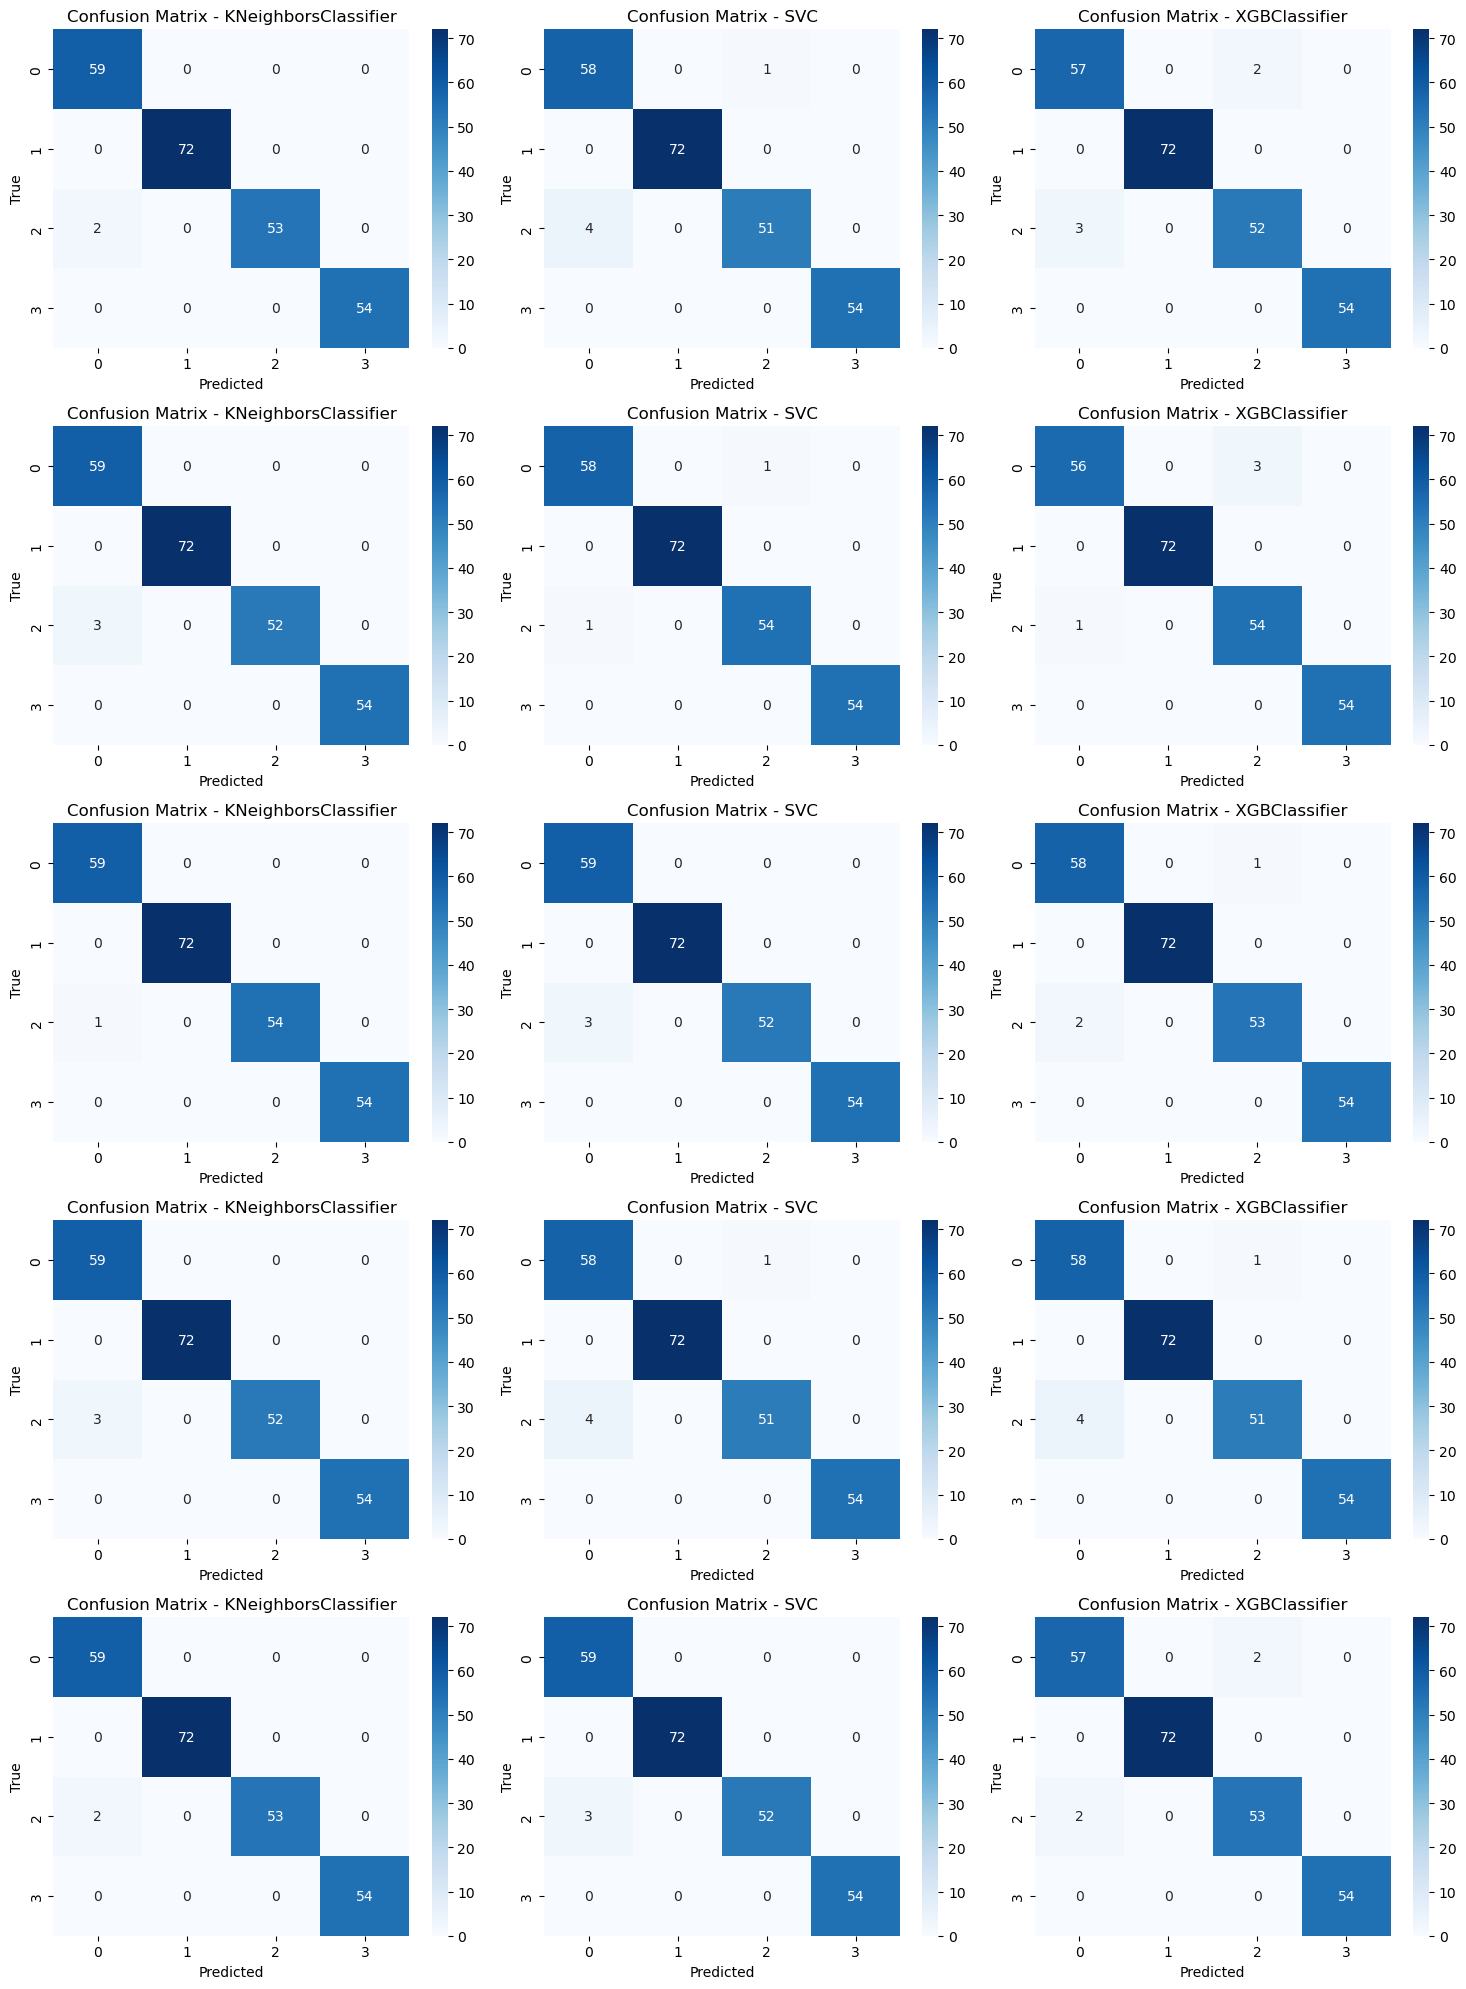

In [76]:
# Bind and generate metrics table
model_binding(models, test_inputs, test_targets)
ans = generate_metrics_table(modelsets,test_inputs)

# show table
ans

#### 4. Summary and Discussion


In this model, the data is loaded first, and we select the features that affect the top 50% of the label, which improves the accuracy of the model to a certain extent, and we retain the most data, and the missing values ​​and outliers are replaced by the mean value. , and then standardized, which can improve the generalization ability of the model. In the K-folder cross-validation, the last model we choose is the parameter with the best effect on the verification set, and on this basis, we compare various models and choose the best the one. Finally, the test set comparison found that it was consistent with our expected results

The evaluation metrics for each model are shown in the table below:

|         Model         | Accuracy | Precision |  Recall  | F1 Score |    AUC   |
|:---------------------:|:--------:|:---------:|:--------:|:--------:|:-------:|
| KNeighborsClassifier | 0.995833 |  0.995833 | 0.995455 | 0.995606 | 0.997037|
|         SVC           | 0.991667 |  0.991217 | 0.991217 | 0.991217 | 0.999808|
|    XGBClassifier      | 0.987500 |  0.987037 | 0.986672 | 0.986817 | 0.999544|


Based on the provided metrics, the KNeighborsClassifier model achieved the highest scores in accuracy, precision, recall, F1 score, and AUC, indicating strong overall performance. The SVC model and XGBClassifier model also performed well across the metrics, securing the second and third positions, respectively.


It is important to note that the performance of each model can vary depending on the specific dataset and problem domain. Therefore, it is recommended to consider multiple evaluation metrics and choose the model that best aligns with the project requirements and objectives.

Overall, this experiment demonstrates the process of data preprocessing, feature selection, model parameter tuning, and model evaluation, providing valuable insights into the performance of different models on the given dataset.



|   Team Member   |               Contribution               |  Contribution Percentage |
|:---------------:|:---------------------------------------:|:-----------------------:|
|    Mei Ran      |  Main framework, data loading, model training and testing part  |           50%           |
|  Li Sheng Xi    |     Feature engineering, outlier processing     |           25%           |
| Zhang Jing Yuan |        Image visualization, summary         |           25%           |


